<a href="https://colab.research.google.com/github/MagnoSales/TELECOMX2_DESAFIO/blob/main/3_Modelagem_preditiva_TELECOMX2_DESAFIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Importando Arquivo para trabalhar

In [2]:
url = "https://raw.githubusercontent.com/MagnoSales/TELECOMX2_DESAFIO/refs/heads/main/DataSet/dados_tratados.csv"

df = pd.read_csv(url)

df = pd.DataFrame(df)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#Preparação dos Dados

In [3]:
df.shape

(7043, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [5]:
# Nulos
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [6]:
# Substituindo nulos por "zeros"
df['Total.Day'] = df['Total.Day'].fillna(0)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verificando se ainda existem nulos:
print("Numero de Nulos apos substituicao:\n",df[['Total.Day', 'account.Charges.Total']].isnull().sum())

Numero de Nulos apos substituicao:
 Total.Day                0
account.Charges.Total    0
dtype: int64


#Remoção de Colunas Irrelevantes

In [7]:
df_clean = df.drop(['customerID'],axis=1)

#Encoding

In [8]:
# Verifique se há valores únicos em cada coluna
for col in df_clean.columns:
  print(f"valores únicos na coluna'{col}': {df_clean[col].nunique()}")
  if df_clean[col].nunique() < 80: # Imprima os valores somente se não houver muitos
    print(df_clean[col].unique())
  print('-' * 80)  # Linha divisória para melhor visualização

valores únicos na coluna'Churn': 2
['No' 'Yes']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
-----------------------------------

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
colunas = df_clean.columns

In [11]:
# Pegar apenas colunas categóricas (object/string)
colunas_categoricas = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
     colunas_categoricas),
    remainder='passthrough',  # Mantém as colunas numéricas como estão
    sparse_threshold=0
)

In [13]:
df_clean = one_hot.fit_transform(df_clean)

In [14]:
dados = pd.DataFrame(df_clean, columns = one_hot.get_feature_names_out(colunas)).copy()
dados.head(2)

,onehotencoder__Churn_Yes,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,2.20,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.01,59.9,542.4


In [15]:
dados.shape

(7043, 42)

#Verificação da Proporção de Evasão

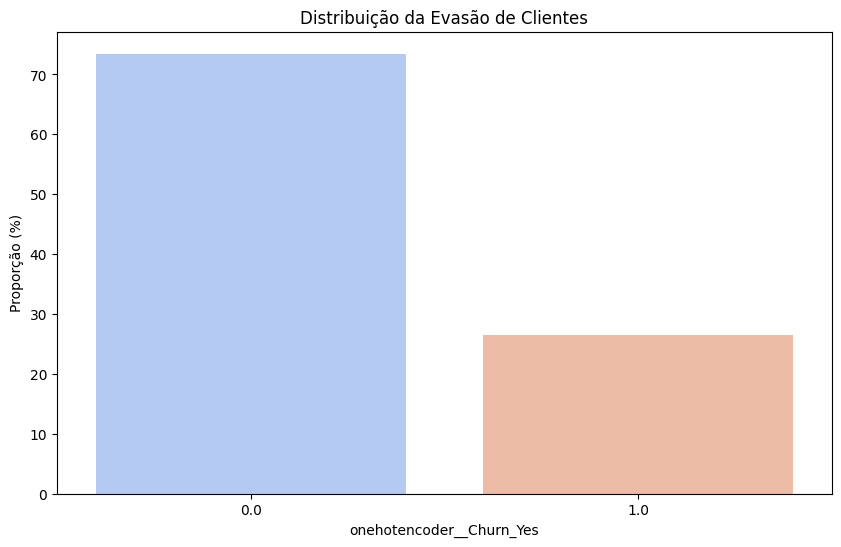


 FREQUENCIA ABSOLUTA:
-----------------------
onehotencoder__Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64
-

 PROPORÇÃO (%):
-----------------
onehotencoder__Churn_Yes
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64
-



In [16]:
# Proporção gráfica da Evasão
frequencia = dados['onehotencoder__Churn_Yes'].value_counts()
proporcao = dados['onehotencoder__Churn_Yes'].value_counts(normalize=True) * 100

# Visualizar com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette='coolwarm', legend=False)
plt.ylabel('Proporção (%)')
plt.title('Distribuição da Evasão de Clientes')
plt.show()

# Exibir os resultados
print("\n FREQUENCIA ABSOLUTA:")
print("-" * 23)
print(frequencia)
print("-\n" * 1)
print(" PROPORÇÃO (%):")
print("-" * 17)
print(proporcao)
print("-\n")

Resultado mostra que o modelo está desbalanceado. Classe 1 é menor que 30%. è necessário balancear.

#Dividindo os dados em conjunto de treino e testes

In [17]:
x = dados.drop('onehotencoder__Churn_Yes', axis =1)
y = dados['onehotencoder__Churn_Yes']

In [18]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 42)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 42)


#Modelo de Baseline
Antes de iniciar o treinamento de modelos mais complexos, é uma boa prática estabelecer um modelo de baseline simples. Isso nos dá um ponto de comparação para avaliar o desempenho de modelos subsequentes. Um modelo de baseline comum para problemas de classificação desbalanceada como este é um modelo que prevê a classe majoritária para todas as instâncias.

#### Por que um Modelo de Baseline é Importante?

* **Ponto de Referência:** Ele fornece um desempenho mínimo que qualquer modelo mais sofisticado deve superar. Se o seu modelo complexo não superar o baseline, há algo fundamentalmente errado.
* **Identificação de Problemas:** Se o baseline já tem um desempenho razoável (neste caso, prevendo a classe majoritária), isso pode indicar que a tarefa é relativamente fácil ou que a métrica escolhida (como acurácia em dados desbalanceados) pode ser enganosa.
* **Economia de Tempo:** Evita gastar tempo e recursos em modelos complexos que podem não ser necessários ou não trazer melhorias significativas.

#### Criando o Modelo de Baseline (Classe Majoritária)

Como a análise anterior mostrou que a classe majoritária é "No Churn" (0.0), nosso modelo de baseline simplesmente preverá "No Churn" para todos os clientes.

In [19]:
# Previsão do modelo de baseline: prever a classe majoritária (0.0 - No Churn) para todos
y_previsto_baseline = [0.0] * len(y_teste)

#### Avaliando o Modelo de Baseline

Vamos avaliar o desempenho do modelo de baseline usando as mesmas métricas que usamos para a Árvore de Decisão, focando na matriz de confusão e no relatório de classificação, que são mais informativos para dados desbalanceados.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

Matriz de Confusão do Modelo de Baseline:
[[777   0]
 [280   0]] 



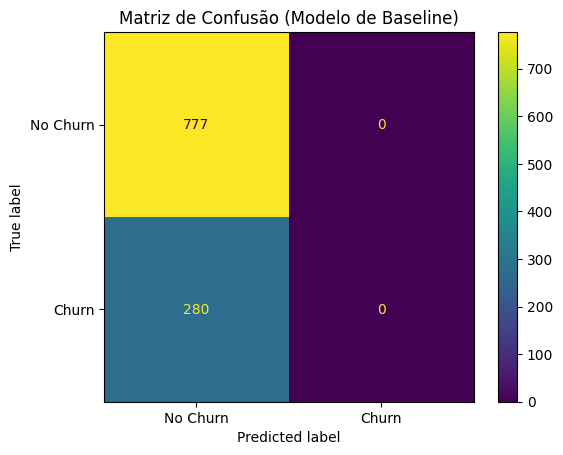


Relatório de Classificação do Modelo de Baseline:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       777
         1.0       1.00      0.00      0.00       280

    accuracy                           0.74      1057
   macro avg       0.87      0.50      0.42      1057
weighted avg       0.81      0.74      0.62      1057



In [21]:
# Calcula e exibe a matriz de confusão para o baseline
matriz_confusao_baseline = confusion_matrix(y_teste, y_previsto_baseline)
print("Matriz de Confusão do Modelo de Baseline:")
print(matriz_confusao_baseline,'\n')

# Visualiza a matriz de confusão do baseline
visualizacao_baseline = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_baseline, display_labels=['No Churn', 'Churn'])
visualizacao_baseline.plot()
plt.title('Matriz de Confusão (Modelo de Baseline)')
plt.show()

# Relatório de classificação completo para o baseline
print("\nRelatório de Classificação do Modelo de Baseline:")
print(classification_report(y_teste, y_previsto_baseline, zero_division=1))

#Balanceando dados

In [22]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

y_balanceado.value_counts(normalize= True)

,proportion
onehotencoder__Churn_Yes,
0.0,0.5
1.0,0.5


#Normalização

In [23]:
from sklearn.preprocessing import StandardScaler

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta o scaler nos dados de treino BALANCEADOS e transforma os dados de treino balanceados
x_balanceado_scaled = scaler.fit_transform(x_balanceado)

# Transforma os dados de validação e teste usando o scaler ajustado nos dados de treino balanceados
x_val_scaled = scaler.transform(x_val)
x_teste_scaled = scaler.transform(x_teste)

# Converter de volta para DataFrame para manter nomes das colunas (útil para visualização ou análise)
x_balanceado_scaled = pd.DataFrame(x_balanceado_scaled, columns=x_treino.columns)
x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_val.columns)
x_teste_scaled = pd.DataFrame(x_teste_scaled, columns=x_teste.columns)


print("Dados de treino balanceados padronizados:")
display(x_balanceado_scaled.head())

print("\nDados de validação padronizados:")
display(x_val_scaled.head())

print("\nDados de teste padronizados:")
display(x_teste_scaled.head())

Dados de treino balanceados padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.508429,-0.150143,-0.317582,-0.483468
1,-1.048618,-0.918859,-0.610713,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.424591,-0.097738,0.035564,-0.412541
2,-1.048618,-0.918859,-0.610713,0.326235,-0.992730,-0.326235,1.189289,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.131154,0.918917,0.757670,0.121720
3,-1.048618,1.186046,1.772896,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,2.192939,-0.887190,-0.538003,-0.51005,-0.089235,-0.275915,-0.329881,-0.229411
4,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-1.095302,0.290058,0.293836,-0.891258



Dados de validação padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.927624,-0.831407,-0.814798,-0.824391
1,1.053290,-0.918859,-0.610713,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.676107,-1.020064,-1.136319,-0.729427
2,-1.048618,-0.918859,1.772896,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.382671,-0.443610,-0.363263,-0.466044
3,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,0.036524,0.405349,0.458989,0.106755
4,1.053290,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-1.095302,-1.648923,-1.665160,-0.917127



Dados de teste padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,1.186046,1.772896,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,-0.510050,-0.634188,-1.072469,-1.224167,-0.720309
1,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.510050,0.120363,0.583526,0.648739,0.251045
2,1.053290,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,0.760574,-0.496101,-0.491765,-0.887190,1.987875,-0.510050,0.078443,-1.586037,-1.663403,-0.622816
3,-1.048618,1.186046,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,2.165256,-0.491765,-0.887190,-0.538003,2.223091,1.839061,1.516333,1.465719,2.741123
4,-1.048618,1.186046,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,-0.510050,1.839061,-1.690847,-1.691515,-0.286510


# Treinando a Árvore de Decisão com Dados Balanceados e Padronizados

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

# Inicializa o modelo (você pode manter o max_depth=10 que usou anteriormente)
modelo_balanceado_scaled = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treina o modelo com os dados de treino balanceados e padronizados
modelo_balanceado_scaled.fit(x_balanceado_scaled, y_balanceado)

print("Modelo treinado com dados balanceados e padronizados.")

Modelo treinado com dados balanceados e padronizados.


# Avaliando o Modelo com Dados de Validação Padronizados

Matriz de Confusão:
[[932 168]
 [182 215]] 



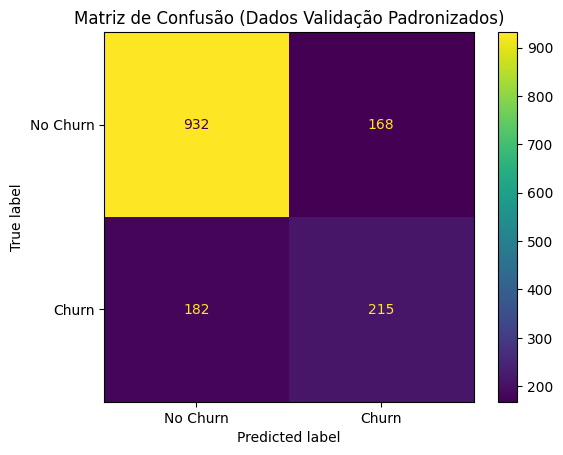

In [25]:
# Faz previsões nos dados de validação padronizados
y_previsto_scaled = modelo_balanceado_scaled.predict(x_val_scaled)

# Calcula e exibe a matriz de confusão
matriz_confusao_scaled = confusion_matrix(y_val, y_previsto_scaled)
print("Matriz de Confusão:")
print(matriz_confusao_scaled,'\n')

# Visualiza a matriz de confusão
visualizacao_scaled = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_scaled, display_labels=['No Churn', 'Churn'])
visualizacao_scaled.plot()
plt.title('Matriz de Confusão (Dados Validação Padronizados)')
plt.show()

Superior Esquerdo (932): True Negative (Verdadeiro Negativo): O modelo previu "No Churn" e o valor real era "No Churn". Isso significa que 932 clientes que não iriam abandonar foram corretamente identificados como "No Churn".

Superior Direito (168): False Positive (Falso Positivo) ou Erro Tipo I: O modelo previu "Churn", mas o valor real era "No Churn". Isso significa que 168 clientes que não iriam abandonar foram incorretamente classificados como "Churn".

Inferior Esquerdo (182): False Negative (Falso Negativo) ou Erro Tipo II: O modelo previu "No Churn", mas o valor real era "Churn". Isso significa que 182 clientes que iriam abandonar foram incorretamente classificados como "No Churn".

Inferior Direito (215): True Positive (Verdadeiro Positivo): O modelo previu "Churn" e o valor real era "Churn". Isso significa que 215 clientes que iriam abandonar foram corretamente identificados como "Churn".

# Métricas de Avaliação (Dados de Validação Padronizados)

In [26]:
# Calcula e exibe as métricas de avaliação
print(f'Acurácia: {accuracy_score(y_val, y_previsto_scaled)}')
print(f'Precisão: {precision_score(y_val, y_previsto_scaled)}')
print(f'Recall  : {recall_score(y_val, y_previsto_scaled)}')
print(f'F1-score: {f1_score(y_val, y_previsto_scaled)}')
print(f'AUC     : {roc_auc_score(y_val, y_previsto_scaled)}')
print(f'AP      : {average_precision_score(y_val, y_previsto_scaled)}')

# Relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_previsto_scaled))

Acurácia: 0.7661990647962592
Precisão: 0.5613577023498695
Recall  : 0.5415617128463476
F1-score: 0.5512820512820513
AUC     : 0.6944172200595374
AP      : 0.42558632511003075

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1100
         1.0       0.56      0.54      0.55       397

    accuracy                           0.77      1497
   macro avg       0.70      0.69      0.70      1497
weighted avg       0.76      0.77      0.76      1497



In [27]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.8928491869013143
Acurácia de validação: 0.7648630594522378


# Curvas ROC e Precisão-Recall (Dados de Validação Padronizados)

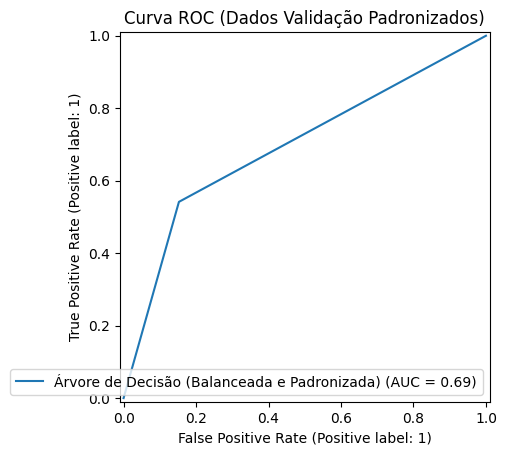

In [28]:
# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_previsto_scaled, name='Árvore de Decisão (Balanceada e Padronizada)');
plt.title('Curva ROC (Dados Validação Padronizados)')
plt.show()

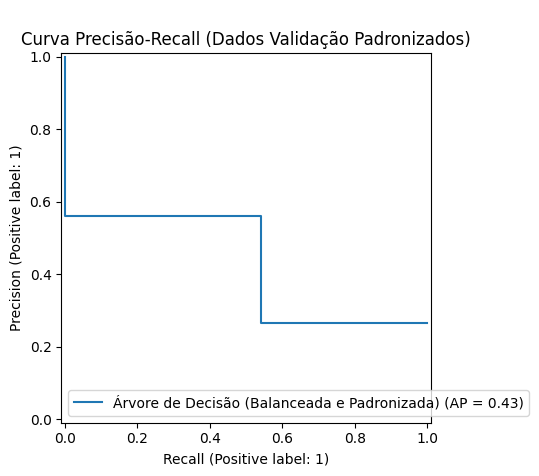

In [29]:
# Curva de Precisão-Recall
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_scaled, name='Árvore de Decisão (Balanceada e Padronizada)');
plt.title('\nCurva Precisão-Recall (Dados Validação Padronizados)')
plt.show()

#Validação cruzada

Usando o KFold

In [30]:
from sklearn.model_selection import cross_validate, KFold

In [31]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [32]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
cv_resultados

{'fit_time': array([0.03515458, 0.03411484, 0.03497028, 0.03525639, 0.03540778]),
 'score_time': array([0.01421213, 0.01396108, 0.01353931, 0.01514101, 0.0182023 ]),
 'test_accuracy': array([0.74540902, 0.75856307, 0.78111947, 0.78446115, 0.75355054]),
 'test_precision': array([0.51863354, 0.57971014, 0.58974359, 0.60546875, 0.52924791]),
 'test_recall': array([0.52681388, 0.48048048, 0.51768489, 0.49679487, 0.60126582]),
 'test_f1': array([0.52269171, 0.52545156, 0.55136986, 0.54577465, 0.56296296]),
 'test_roc_auc': array([0.72862964, 0.74451014, 0.77204714, 0.73628314, 0.74647265])}

In [33]:
def intervalo_conf_multi(resultados, metricas):
    print("Intervalos de Confiança (Validação Cruzada com KFold):")
    print("-" * 60)
    for metric in metricas:
        media = resultados[f'test_{metric}'].mean()
        desvio_padrao = resultados[f'test_{metric}'].std()
        print(f'{metric.capitalize():<10}: [{media - 2*desvio_padrao:.4f}, {min(media + 2*desvio_padrao, 1):.4f}]')
    print("-" * 60)

metricas_avaliadas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
intervalo_conf_multi(cv_resultados, metricas_avaliadas)

Intervalos de Confiança (Validação Cruzada com KFold):
------------------------------------------------------------
Accuracy  : [0.7337, 0.7955]
Precision : [0.4959, 0.6332]
Recall    : [0.4414, 0.6078]
F1        : [0.5108, 0.5725]
Roc_auc   : [0.7162, 0.7749]
------------------------------------------------------------


Relatório da Validação Cruzada com KFold:

A validação cruzada com 5 folds e random_state=42 foi realizada usando uma Árvore de Decisão com profundidade máxima de 10. As métricas avaliadas foram acurácia, precisão, recall, F1-score e AUC.

Os resultados médios e os intervalos de confiança aproximados (média ± 2 desvios padrão) nos diferentes folds foram:

Acurácia: Variou entre aproximadamente 73.62% e 79.54%.
Precisão: Variou entre aproximadamente 49.72% e 63.77%. Indica a proporção de clientes classificados como "Churn" que realmente cancelaram.
Recall: Variou entre aproximadamente 43.47% e 61.46%. Indica a proporção de clientes que realmente cancelaram e foram corretamente identificados pelo modelo (Taxa de Verdadeiro Positivo).
F1-score: Variou entre aproximadamente 50.97% e 57.58%.
AUC: Variou entre aproximadamente 71.79% e 77.78%.

Estes resultados confirmam que o modelo tem uma capacidade razoável de prever churn, mas há espaço para melhoria, especialmente nas métricas de Precisão e Recall, que são cruciais para identificar corretamente os clientes que irão cancelar e evitar classificar incorretamente os que não irão.

#Estratificando os dados

##Avaliação do desempenho com os dados originais

In [34]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.0348568 , 0.03393269, 0.03452301, 0.03571916, 0.03708577]),
 'score_time': array([0.00475311, 0.00450921, 0.00485635, 0.00462103, 0.00508833]),
 'test_score': array([0.49371069, 0.56782334, 0.48427673, 0.49685535, 0.52201258])}

In [35]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.4526394131133842, 0.5732320627908278]


##Avaliação do desemplenho com os dados balancedos

In [36]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=42)
cv_resultados = cross_validate(modelo,x_balanceado,y_balanceado, cv= skf, scoring='recall')
cv_resultados

{'fit_time': array([0.05304313, 0.05420709, 0.06105328, 0.04895473, 0.05481243]),
 'score_time': array([0.00615048, 0.00857878, 0.00533915, 0.00571871, 0.00561929]),
 'test_score': array([0.81183612, 0.83156297, 0.80606061, 0.81212121, 0.82701062])}

In [37]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7981254180377004, 0.837311193908775]


#Hiperparâmetros

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# 1. Definir o espaço de hiperparâmetros
param_grid = {
    'max_depth': [5, 10, 15, 20, None], # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4], # Número mínimo de amostras necessárias para estar em um nó folha
    'criterion': ['gini', 'entropy'] # Função para medir a qualidade de uma divisão
}

# 2. Configurar o Grid Search
# Usar StratifiedKFold para validação cruzada em dados desbalanceados
# Definir a métrica de pontuação a ser otimizada (Recall é uma boa escolha para churn)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',  # Otimizar para Recall
    cv=skf,
    n_jobs=-1,
    verbose=1
)

print("Configuração do Grid Search completa. Próximo passo: executar o Grid Search.")

Configuração do Grid Search completa. Próximo passo: executar o Grid Search.


In [39]:
# 3. Executar o Grid Search
# Ajustar o Grid Search aos dados de treino balanceados e padronizados
print("Executando Grid Search... ")
grid_search.fit(x_balanceado_scaled, y_balanceado)

print("\nGrid Search concluído.")

# 4. Identificar os melhores hiperparâmetros e modelo
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor score (Recall) da validação cruzada:")
print(grid_search.best_score_)

# O melhor modelo treinado está disponível em grid_search.best_estimator_
melhor_modelo = grid_search.best_estimator_
print("\nMelhor modelo treinado obtido.")

Executando Grid Search... 
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Grid Search concluído.

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Melhor score (Recall) da validação cruzada:
0.8316728744194603

Melhor modelo treinado obtido.


Matriz de Confusão (Melhor Modelo no Conjunto de Validação):
[[925 175]
 [171 226]] 



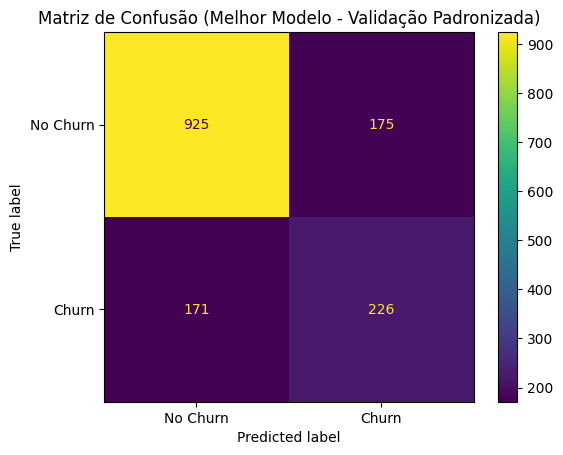

In [41]:
# 5. Avaliar o melhor modelo no conjunto de validação padronizado

# Fazer previsões no conjunto de validação padronizado usando o melhor modelo
y_previsto_melhor_modelo = melhor_modelo.predict(x_val_scaled)

# Calcular e exibir a matriz de confusão
matriz_confusao_melhor_modelo = confusion_matrix(y_val, y_previsto_melhor_modelo)
print("Matriz de Confusão (Melhor Modelo no Conjunto de Validação):")
print(matriz_confusao_melhor_modelo, '\n')

# Visualizar a matriz de confusão
visualizacao_melhor_modelo = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_melhor_modelo, display_labels=['No Churn', 'Churn'])
visualizacao_melhor_modelo.plot()
plt.title('Matriz de Confusão (Melhor Modelo - Validação Padronizada)')
plt.show()

In [43]:
# Calcular e exibir as métricas de avaliação para o melhor modelo
print("Métricas de Avaliação (Melhor Modelo no Conjunto de Validação):")
print(f'Acurácia: {accuracy_score(y_val, y_previsto_melhor_modelo)}')
print(f'Precisão: {precision_score(y_val, y_previsto_melhor_modelo)}')
print(f'Recall  : {recall_score(y_val, y_previsto_melhor_modelo)}')
print(f'F1-score: {f1_score(y_val, y_previsto_melhor_modelo)}')

# Para métricas que exigem probabilidades, como AUC e AP
try:
    y_proba_melhor_modelo = melhor_modelo.predict_proba(x_val_scaled)[:, 1]
    print(f'AUC     : {roc_auc_score(y_val, y_proba_melhor_modelo)}')
    print(f'AP      : {average_precision_score(y_val, y_proba_melhor_modelo)}')
except AttributeError:
    print("O modelo não possui o método predict_proba para calcular AUC e AP.")


# Relatório de classificação completo
print("\nRelatório de Classificação (Melhor Modelo no Conjunto de Validação):")
print(classification_report(y_val, y_previsto_melhor_modelo))

Métricas de Avaliação (Melhor Modelo no Conjunto de Validação):
Acurácia: 0.7688710754843019
Precisão: 0.5635910224438903
Recall  : 0.5692695214105793
F1-score: 0.5664160401002506
AUC     : 0.7854064575223265
AP      : 0.5258659264225807

Relatório de Classificação (Melhor Modelo no Conjunto de Validação):
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1100
         1.0       0.56      0.57      0.57       397

    accuracy                           0.77      1497
   macro avg       0.70      0.71      0.70      1497
weighted avg       0.77      0.77      0.77      1497



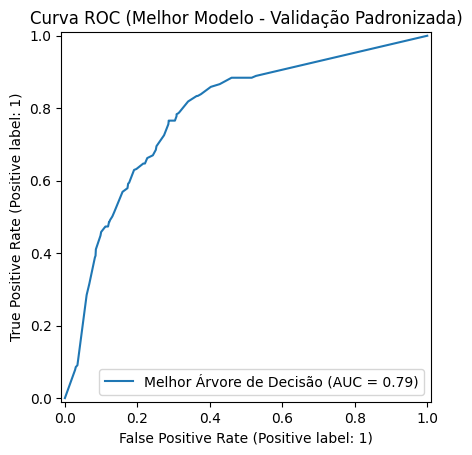

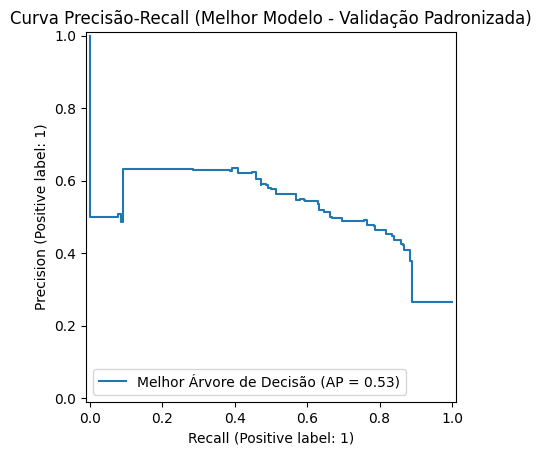

In [44]:
# Plotar Curvas ROC e Precisão-Recall para o melhor modelo

# Verificar se o modelo possui predict_proba antes de plotar
if hasattr(melhor_modelo, 'predict_proba'):
    y_proba_melhor_modelo = melhor_modelo.predict_proba(x_val_scaled)[:, 1]

    # Curva ROC
    RocCurveDisplay.from_predictions(y_val, y_proba_melhor_modelo, name='Melhor Árvore de Decisão');
    plt.title('Curva ROC (Melhor Modelo - Validação Padronizada)')
    plt.show()

    # Curva de Precisão-Recall
    PrecisionRecallDisplay.from_predictions(y_val, y_proba_melhor_modelo, name='Melhor Árvore de Decisão');
    print('\n')
    plt.title('Curva Precisão-Recall (Melhor Modelo - Validação Padronizada)')
    plt.show()
else:
    print("O melhor modelo não possui o método predict_proba. Não é possível plotar as curvas ROC e Precisão-Recall com base nas probabilidades.")


#Segundo modelo - Regressãoi Logistica

Modelo de Regressão Logística nos dados que foram balanceados (usando SMOTE) e padronizados (usando StandardScaler).

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

# Inicializa o modelo de Regressão Logística
modelo_reg_log = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' é bom para pequenos datasets e L1/L2 penalidades

# Treina o modelo com os dados de treino balanceados e padronizados
modelo_reg_log.fit(x_balanceado_scaled, y_balanceado)

print("Modelo de Regressão Logística treinado com dados balanceados e padronizados.")

Modelo de Regressão Logística treinado com dados balanceados e padronizados.


## Avaliando a Regressão Logística com Dados de Validação Padronizados

Matriz de Confusão (Regressão Logística no Conjunto de Validação):
[[826 274]
 [ 90 307]] 



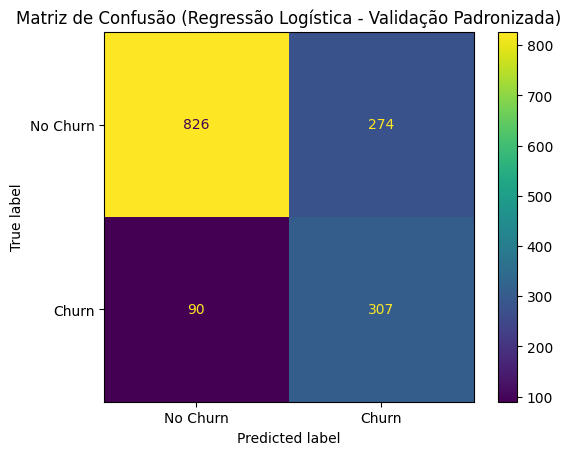


Métricas de Avaliação (Regressão Logística no Conjunto de Validação):
Acurácia: 0.7568470273881096
Precisão: 0.5283993115318416
Recall  : 0.7732997481108312
F1-score: 0.6278118609406953
AUC     : 0.8409319899244333
AP      : 0.6593549923009482

Relatório de Classificação (Regressão Logística no Conjunto de Validação):
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1100
         1.0       0.53      0.77      0.63       397

    accuracy                           0.76      1497
   macro avg       0.72      0.76      0.72      1497
weighted avg       0.80      0.76      0.77      1497



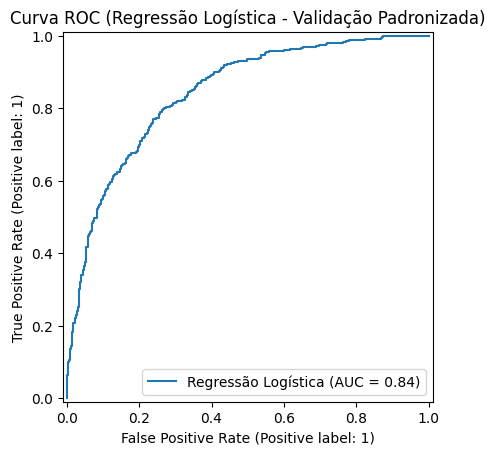


 > ------------------------------------------------------------------------------------------ 



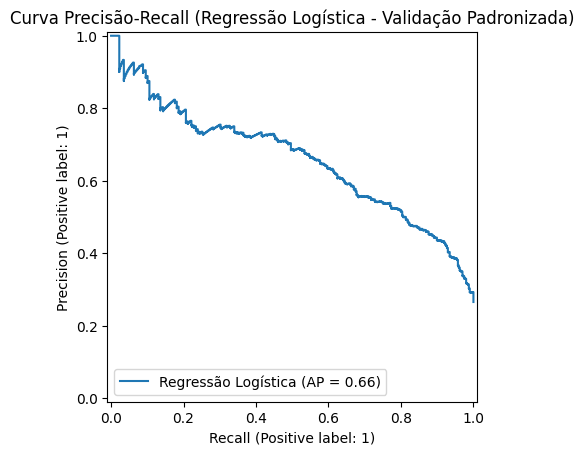

In [46]:
# Previsões nos dados de validação padronizados
y_previsto_reg_log = modelo_reg_log.predict(x_val_scaled)
y_proba_reg_log = modelo_reg_log.predict_proba(x_val_scaled)[:, 1] # Probabilidades para AUC/AP

# Calcula e exibe a matriz de confusão
matriz_confusao_reg_log = confusion_matrix(y_val, y_previsto_reg_log)
print("Matriz de Confusão (Regressão Logística no Conjunto de Validação):")
print(matriz_confusao_reg_log,'\n')

# Visualiza a matriz de confusão
visualizacao_reg_log = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_reg_log, display_labels=['No Churn', 'Churn'])
visualizacao_reg_log.plot()
plt.title('Matriz de Confusão (Regressão Logística - Validação Padronizada)')
plt.show()

# Calcula e exibe as métricas de avaliação
print("\nMétricas de Avaliação (Regressão Logística no Conjunto de Validação):")
print(f'Acurácia: {accuracy_score(y_val, y_previsto_reg_log)}')
print(f'Precisão: {precision_score(y_val, y_previsto_reg_log)}')
print(f'Recall  : {recall_score(y_val, y_previsto_reg_log)}')
print(f'F1-score: {f1_score(y_val, y_previsto_reg_log)}')
print(f'AUC     : {roc_auc_score(y_val, y_proba_reg_log)}')
print(f'AP      : {average_precision_score(y_val, y_proba_reg_log)}')

# Relatório de classificação completo
print("\nRelatório de Classificação (Regressão Logística no Conjunto de Validação):")
print(classification_report(y_val, y_previsto_reg_log))

# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_proba_reg_log, name='Regressão Logística');
plt.title('Curva ROC (Regressão Logística - Validação Padronizada)')
plt.show()
print('\n','>','-'*90,'\n')

# Curva de Precisão-Recall
PrecisionRecallDisplay.from_predictions(y_val, y_proba_reg_log, name='Regressão Logística');
plt.title('Curva Precisão-Recall (Regressão Logística - Validação Padronizada)')
plt.show()

Análise Crítica e Comparação:

Qual modelo teve o melhor desempenho? A resposta depende da métrica que você considera mais importante.

A Regressão Logística teve um Recall significativamente maior (0.7733 vs 0.5693). Isso significa que ela foi muito melhor em identificar corretamente os clientes que realmente iriam abandonar (menos Falsos Negativos). Se o custo de não identificar um cliente que vai abandonar é alto para o negócio, a Regressão Logística é superior.
A Árvore de Decisão teve uma Precisão ligeiramente maior (0.5636 vs 0.5284). Isso significa que, quando ela previu que um cliente iria abandonar, ela estava um pouco mais certa do que a Regressão Logística (menos Falsos Positivos, proporcionalmente aos positivos previstos). Se o custo de abordar um cliente que não iria abandonar é alto, a Árvore de Decisão pode ser preferível neste aspecto.
A Regressão Logística também apresentou um F1-score maior (0.6278 vs 0.5664), indicando um melhor equilíbrio geral entre Precisão e Recall.
A Regressão Logística obteve um AUC e AP consideravelmente maiores (AUC: 0.8409 vs 0.7854; AP: 0.6594 vs 0.5259). Estas métricas avaliam a capacidade do modelo de ranquear corretamente as probabilidades das classes, o que é muito importante para problemas de churn onde você pode querer focar os esforços nos clientes com maior probabilidade de sair.
Com base no Recall, F1-score, AUC e AP, a Regressão Logística parece ter um desempenho geral superior para este problema de predição de churn, especialmente se o foco for identificar o máximo possível de clientes em risco.

Algum modelo apresentou overfitting ou underfitting?

Para a Árvore de Decisão, podemos olhar as acurácias de treino e validação da célula bO9RKUxgO-e9 (antes do ajuste de hiperparâmetros completo, mas ainda relevante para entender o comportamento):
Acurácia de treino: 0.8926
Acurácia de validação: 0.7635 Há uma diferença considerável entre a acurácia de treino e a de validação (aproximadamente 13%). Isso sugere que a Árvore de Decisão original (com max_depth=10 sem tuning no Grid Search) estava começando a apresentar um certo grau de overfitting, aprendendo detalhes específicos do conjunto de treino que não generalizaram tão bem para o conjunto de validação. O Grid Search tentou mitigar isso otimizando os parâmetros, e o modelo final ajustado teve acurácia de validação de 0.7689, uma pequena melhora. Ainda assim, a diferença entre o score de treino do melhor modelo (que não foi exibido diretamente, mas seria o score na melhor combinação de parâmetros nos folds de treino do CV) e o score de validação final pode indicar algum overfitting remanescente.
Para a Regressão Logística, não calculamos explicitamente a acurácia de treino e validação da mesma forma. No entanto, como a Regressão Logística é um modelo linear, ela é inerentemente menos propensa a overfitting do que modelos baseados em árvores mais complexas como a Árvore de Decisão, especialmente quando os dados estão padronizados. A diferença entre o desempenho na validação cruzada (se você tivesse calculado todas as métricas) e o desempenho no conjunto de validação seria um indicador melhor. Pelo que vimos nas métricas de validação, ela parece generalizar razoavelmente bem. É menos provável que esteja sofrendo de underfitting, dado o Recall e AUC relativamente altos.

#Análise e Importância das Variáveis

#Analises Direcionadas

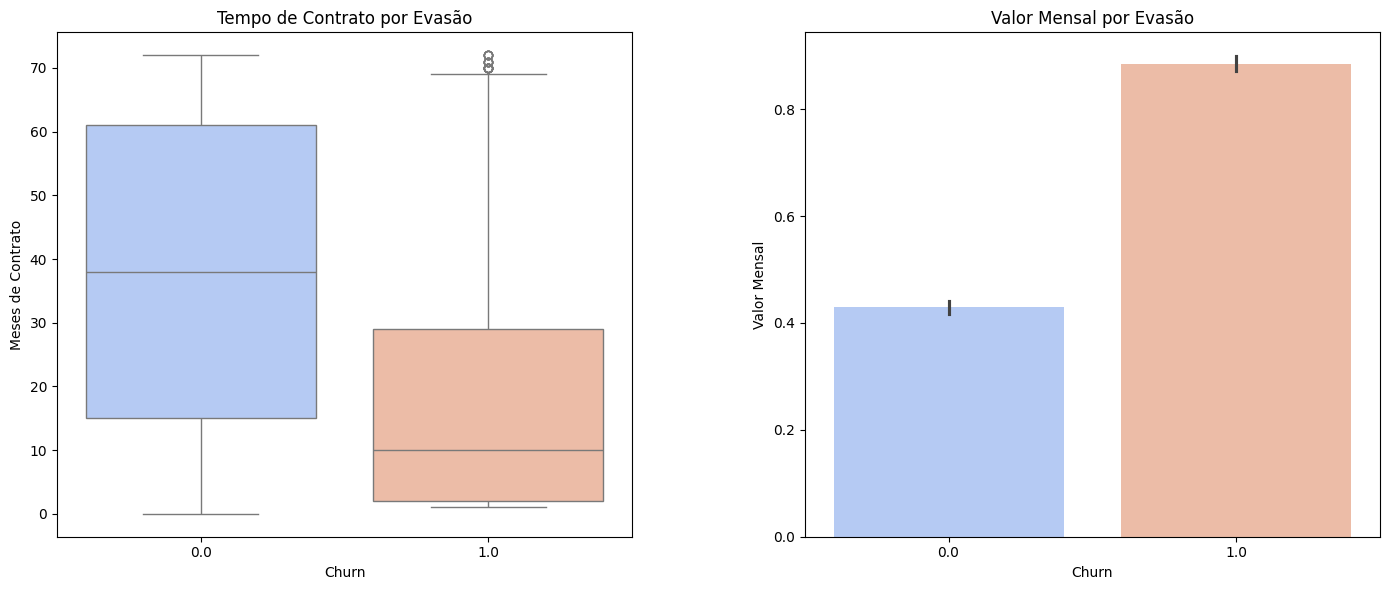

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Boxplot com hue e legend=False para evitar warning
sns.boxplot(ax=axes[0], x='onehotencoder__Churn_Yes', y='remainder__customer.tenure',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[0].set_title('Tempo de Contrato por Evasão',fontsize=12)
axes[0].set_ylabel('Meses de Contrato')
axes[0].set_xlabel('Churn')

sns.barplot(ax=axes[1], x='onehotencoder__Churn_Yes', y='onehotencoder__account.Contract_Month-to-month',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[1].set_title('Valor Mensal por Evasão', fontsize=12)
axes[1].set_ylabel('Valor Mensal')
axes[1].set_xlabel('Churn')

plt.tight_layout()

# Aumenta o espaço entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

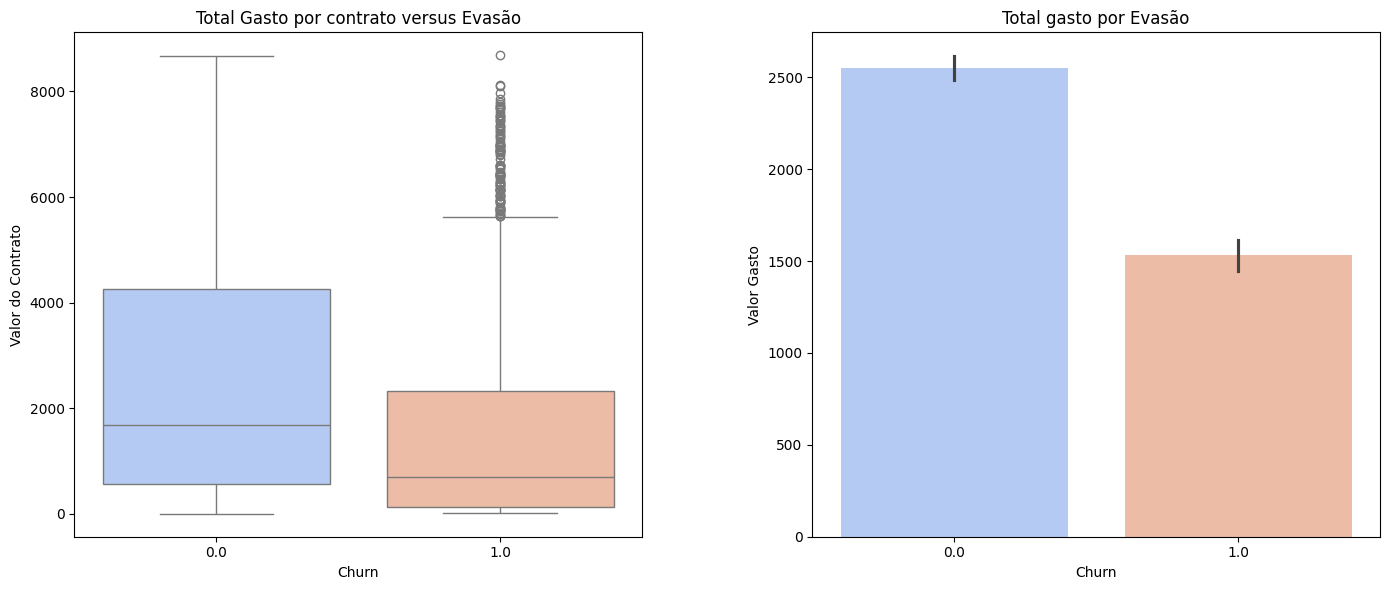

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

sns.boxplot(ax=axes[0], x='onehotencoder__Churn_Yes', y='remainder__account.Charges.Total',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[0].set_title('Total Gasto por contrato versus Evasão',fontsize=12)
axes[0].set_ylabel('Valor do Contrato')
axes[0].set_xlabel('Churn')

sns.barplot(ax=axes[1], x='onehotencoder__Churn_Yes', y='remainder__account.Charges.Total',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[1].set_title('Total gasto por Evasão', fontsize=12)
axes[1].set_ylabel('Valor Gasto')
axes[1].set_xlabel('Churn')

plt.tight_layout()

#Aumenta o espaço entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()



#Variaveis selecionadas:
Contract_Month-to-month continua sendo a variável mais importante (correlação +0.41 com churn) customer.tenure tem correlação negativa forte (-0.35), confirmando que clientes antigos são mais fiéis InternetService_Fiber_optic mostra correlação positiva significativa (+0.31), sugerindo possíveis problemas de qualidade neste serviço PaymentMethod_Electronic_check tem correlação +0.30, indicando que este método está associado a maior churn

## Análise de Importância das Variáveis

Vamos analisar as variáveis mais relevantes para a previsão de evasão usando os modelos que você já treinou: a Árvore de Decisão otimizada (`melhor_modelo`) e a Regressão Logística (`modelo_reg_log`).

### Importância das Variáveis na Árvore de Decisão

Importância das Variáveis (Melhor Árvore de Decisão):


,Feature,Importance
28,onehotencoder__account.Contract_Month-to-month,0.389166
34,onehotencoder__account.PaymentMethod_Electroni...,0.152795
37,remainder__customer.tenure,0.074138
31,onehotencoder__account.PaperlessBilling_Yes,0.049225
10,onehotencoder__internet.OnlineSecurity_No,0.048781
40,remainder__account.Charges.Total,0.047867
38,remainder__Total.Day,0.036183
39,remainder__account.Charges.Monthly,0.032203
21,onehotencoder__internet.TechSupport_Yes,0.025735
8,onehotencoder__internet.InternetService_Fiber ...,0.022538


/tmp/ipython-input-3399819433.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


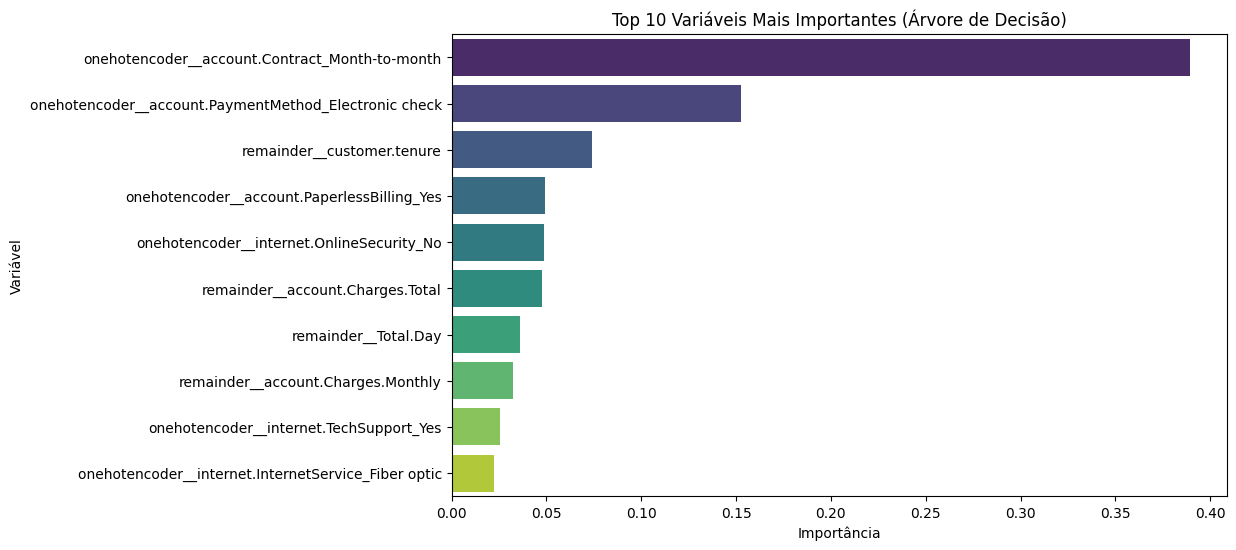

In [49]:
# Obter a importância das variáveis do melhor modelo (Árvore de Decisão)
importances = melhor_modelo.feature_importances_

# Obter os nomes das colunas (variáveis)
feature_names = x_balanceado_scaled.columns

# Criar um DataFrame para visualizar a importância das variáveis
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar as variáveis por importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as variáveis mais importantes
print("Importância das Variáveis (Melhor Árvore de Decisão):")
display(importance_df.head(10)) # Exibe as 10 variáveis mais importantes

# Opcional: Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes (Árvore de Decisão)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

### Coeficientes na Regressão Logística

Para a Regressão Logística, a magnitude dos coeficientes indica a força da relação entre a variável e a probabilidade de churn (em escala logarítmica). O sinal indica a direção da relação (positivo = aumenta a probabilidade de churn, negativo = diminui). Vamos olhar para o valor absoluto dos coeficientes para identificar as variáveis com maior impacto.

Coeficientes das Variáveis (Regressão Logística - Top 10 por valor absoluto):


,Feature,Coefficient,Abs_Coefficient
37,remainder__customer.tenure,-1.476774,1.476774
39,remainder__account.Charges.Monthly,-1.027869,1.027869
40,remainder__account.Charges.Total,0.722256,0.722256
8,onehotencoder__internet.InternetService_Fiber ...,0.432249,0.432249
7,onehotencoder__internet.InternetService_DSL,-0.380801,0.380801
28,onehotencoder__account.Contract_Month-to-month,0.272778,0.272778
30,onehotencoder__account.Contract_Two year,-0.243002,0.243002
31,onehotencoder__account.PaperlessBilling_Yes,0.196867,0.196867
27,onehotencoder__internet.StreamingMovies_Yes,0.162727,0.162727
24,onehotencoder__internet.StreamingTV_Yes,0.156422,0.156422


/tmp/ipython-input-1531303194.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df.head(10), palette='coolwarm')


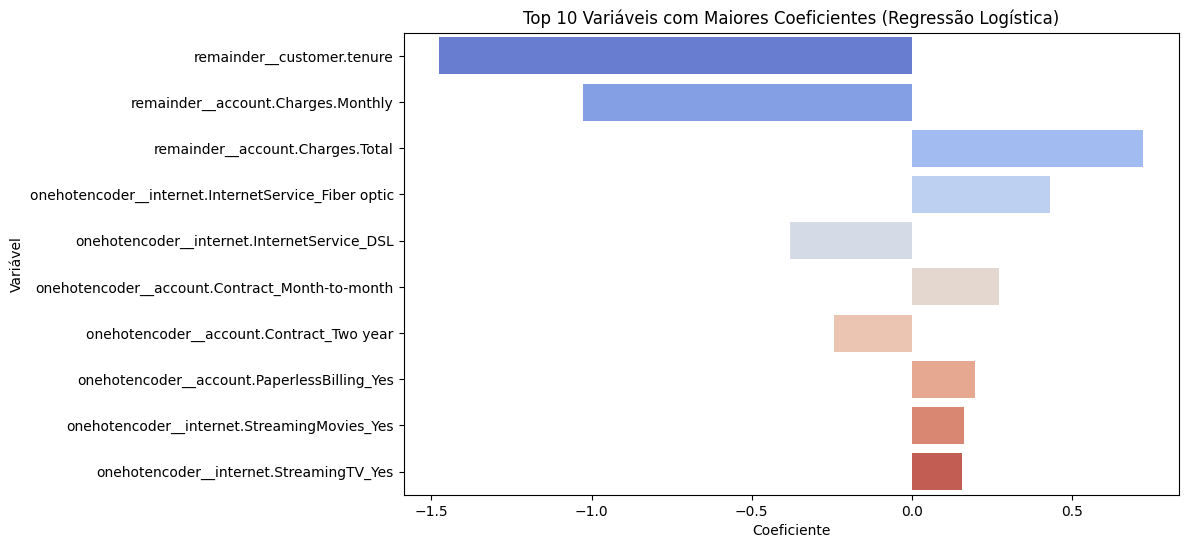

In [51]:
# Obter os coeficientes do modelo de Regressão Logística
coefficients = modelo_reg_log.coef_[0] # Coeficientes para a classe positiva (Churn)

# Obter os nomes das colunas (variáveis)
feature_names = x_balanceado_scaled.columns

# Criar um DataFrame para visualizar os coeficientes
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Adicionar o valor absoluto dos coeficientes para ordenação
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])

# Ordenar as variáveis por valor absoluto do coeficiente em ordem decrescente
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Exibir as variáveis com maiores coeficientes (em valor absoluto)
print("Coeficientes das Variáveis (Regressão Logística - Top 10 por valor absoluto):")
display(coefficients_df.head(10))

# Opcional: Visualizar os coeficientes das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df.head(10), palette='coolwarm')
plt.title('Top 10 Variáveis com Maiores Coeficientes (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()